# Time Series Part 1 - Data Wrangling and Plotting

# Setup

In [0]:
## update the latest seaborn (0.9.0)
!pip install seaborn==0.9.0


In [1]:
## setup our environment



# Date and Time Wrangling

We saw last week that we can build datasets use `date_range` from pandas.  The argument `freq` takes a character string to represent the time of date/time we want to build.  The image below shows these values and is taken from the documentation at the link below.

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

<img src="http://drive.google.com/uc?export=view&id=1U1oVmpmlnkyLba0jc-tGQSZRckmYej_G">



In [2]:
## start basic: generate the days of the year for 2019 up through March 27
days19 = pd.date_range("2019-01-01", "2019-03-27", freq="D")
days19

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [3]:
## lets make this a dataframe, with the date as the index and a random values
returns = {'returns':np.random.normal(0, 2.5, size=len(days19))}
year19 = pd.DataFrame(returns, index=days19)
year19.head()

,returns
2019-01-01,0.844868
2019-01-02,2.785651
2019-01-03,0.654903
2019-01-04,0.151442
2019-01-05,-0.198513


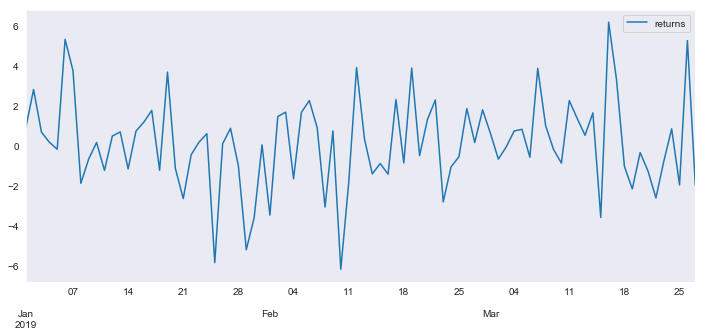

In [4]:
# quick plot
%matplotlib inline
year19.plot(figsize=(12,5))

In [5]:
## what about generating data by minute?
min19 = pd.date_range("2019-01-01", "2019-03-27", freq="T")
min19

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-03-26 23:51:00', '2019-03-26 23:52:00',
               '2019-03-26 23:53:00', '2019-03-26 23:54:00',
               '2019-03-26 23:55:00', '2019-03-26 23:56:00',
               '2019-03-26 23:57:00', '2019-03-26 23:58:00',
               '2019-03-26 23:59:00', '2019-03-27 00:00:00'],
              dtype='datetime64[ns]', length=122401, freq='T')

In [6]:
min19df = pd.DataFrame({'a':np.random.normal(0,2,len(min19))}, index=min19)
min19df.head()

,a
2019-01-01 00:00:00,-0.206279
2019-01-01 00:01:00,-3.180587
2019-01-01 00:02:00,1.346478
2019-01-01 00:03:00,1.691086
2019-01-01 00:04:00,4.416316


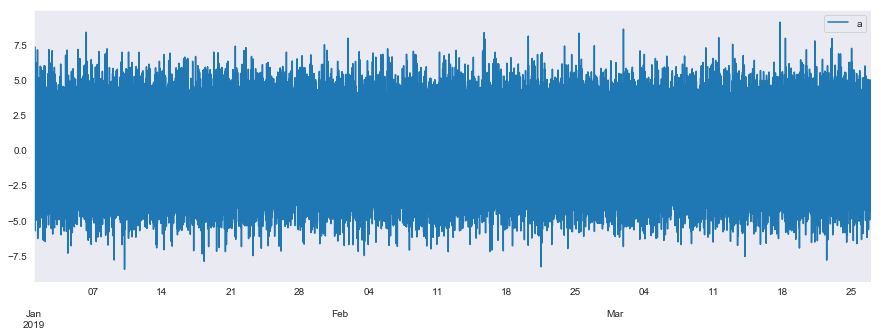

In [7]:
# another quick plot
min19df.plot(figsize=(15, 5))

## Quick Exercise: 

Generate a random weekly dataframe (or Series) and plot it

In [17]:
## create the dataset
weeks19 = pd.date_range("2019-01-01", "2019-04-27", freq="W")
ran = {'returns':np.random.normal(0, 2.5, size=len(weeks19))}
out = pd.DataFrame(ran, index=weeks19)
out.head()

,returns
2019-01-06,0.631403
2019-01-13,2.259165
2019-01-20,-3.113803
2019-01-27,-2.579961
2019-02-03,-2.604766


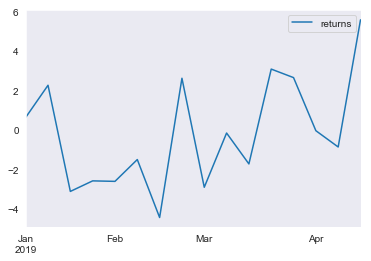

In [19]:
## plot it
out.plot(kind="line")

# Additional Date Parts

We saw last week that we could extract dateparts.  Let's look at a few more, quickly.

In [20]:
year19['date'] = year19.index
year19.head()

,returns,date
2019-01-01,0.844868,2019-01-01
2019-01-02,2.785651,2019-01-02
2019-01-03,0.654903,2019-01-03
2019-01-04,0.151442,2019-01-04
2019-01-05,-0.198513,2019-01-05


In [21]:
year19['weekday'] = year19.date.dt.weekday
year19['quarter'] = year19.date.dt.quarter
year19['weekyear'] = year19.date.dt.weekofyear
year19['dayyear'] = year19.date.dt.dayofyear

In [22]:
year19.tail()

,returns,date,weekday,quarter,weekyear,dayyear
2019-03-23,-0.805444,2019-03-23,5,1,12,82
2019-03-24,0.820167,2019-03-24,6,1,12,83
2019-03-25,-1.983077,2019-03-25,0,1,13,84
2019-03-26,5.232108,2019-03-26,1,1,13,85
2019-03-27,-1.994918,2019-03-27,2,1,13,86


# Filtering with Dates

Lets use the first dataset, year19

### When the column is a datetime

In [23]:
## Keep just February
feb19 = year19.loc[(year19['date'] >= '2019-02-01') & (year19['date'] <= '2019-02-28'), ]

In [24]:
# print out the first and last date
print(feb19['date'].min())
print(feb19['date'].max())

2019-02-01 00:00:00
2019-02-28 00:00:00


## When the index is datetime

In [25]:
## same filter
feb19_index = year19.loc["2019-02-01":"2019-02-28", ]

In [26]:
# print out the first and last date
print(feb19_index['date'].min())
print(feb19_index['date'].max())

2019-02-01 00:00:00
2019-02-28 00:00:00


## We can also use time in the filter too

Use the `min19df` dataframe and select a date and time range

In [27]:
# quick refresher
min19df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122401 entries, 2019-01-01 00:00:00 to 2019-03-27 00:00:00
Freq: T
Data columns (total 1 columns):
a    122401 non-null float64
dtypes: float64(1)
memory usage: 1.9 MB


In [28]:
# filter st paddys day
paddy = min19df.loc['2019-03-17 00:00:00':'2019-03-17 23:59:59', ]

In [29]:
# check what we have
print(paddy.index.min())
print(paddy.index.max())

2019-03-17 00:00:00
2019-03-17 23:59:00


In [30]:
# and because its by minute, how many rows?
len(paddy)

1440

In [31]:
# does this make sense (minutes * hours in a day)?
60*24

1440

# Reshaping Data to fit a Timeseries Format - Melt

Generally speaking, we have seen that our data work well for time series when each observation is a row, and just one column representing the date/time.  

Sometimes we get reports from our team/clients where the date/time is across the columns, where each column is a date and the cell is the value.  While this makes it easy to see in a spreadsheet form, often we need to change the shape of the data to go to the "long" format we have been using.

In pandas, we can `melt` the data.

> Download the stocks.csv file on Questrom Tools and import it as stocks

In [32]:
## read in the file
stocks = pd.read_csv("stocks.csv")

FileNotFoundError: [Errno 2] File b'stocks.csv' does not exist: b'stocks.csv'

In [33]:
## first few rows
stocks.head()

NameError: name 'stocks' is not defined

In [34]:
## melt the dataset from wide (all of the dates as each column, to rows
stocks_long = stocks.melt(id_vars = "ticker")

NameError: name 'stocks' is not defined

In [35]:
# take a look
stocks_long.head()

NameError: name 'stocks_long' is not defined

In [36]:
# we can use other arguments to clean this up
stocks_long = stocks.melt(id_vars="ticker", var_name="date", value_name="close")
stocks_long.head()

NameError: name 'stocks' is not defined

In [37]:
# check the types
stocks_long.dtypes

NameError: name 'stocks_long' is not defined

In [38]:
# as expected, we need to change the column types
# http://strftime.org/
stocks_long['date'] = pd.to_datetime(stocks_long['date'], format="%m/%d/%y")

NameError: name 'stocks_long' is not defined

In [39]:
# confirm
stocks_long.dtypes

NameError: name 'stocks_long' is not defined

## Quick Exercise

For each ticker, calcualte the min/max/and average close

# Plotting multiple series

There is nothing stopping us from plotting the tickers together

In [0]:
sns.lineplot(x="date", y="close", hue="ticker", data=stocks_long)